In [188]:
import openmm as mm
import openmm.app as app
from Bio.PDB import PDBParser, PDBIO
#
from ipywidgets import Image
#
from openff.interchange.components._packmol import (
    RHOMBIC_DODECAHEDRON,
    solvate_topology,
)
from openff.toolkit import ForceField, Molecule, Topology
from openff.units import Quantity
from openff.pablo import CCD_RESIDUE_DEFINITION_CACHE
from ptm_prototype import draw_molecule
#
import rdkit
from rdkit import Chem
from rdkit import IPythonConsole
from rdkit.Chem import Draw
from rdkit.Chem.rdChemReactions import ReactionFromSmarts
print(rdkit.__version__)
#
import IPython
from rdkit.Chem.rdchem import AtomPDBResidueInfo
#
Chem.SetDefaultPickleProperties(Chem.PropertyPickleOptions.AllProps)
draw_options = Chem.Draw.MolDrawOptions()
draw_options.addAtomIndices = True

2025.03.6


In [118]:
parser = PDBParser()
structure = parser.get_structure("9BFX_clean", "9BFX_clean.pdb")
io = PDBIO()
io.set_structure(structure)
io.save("9BFX_clean_biopdb.pdb")

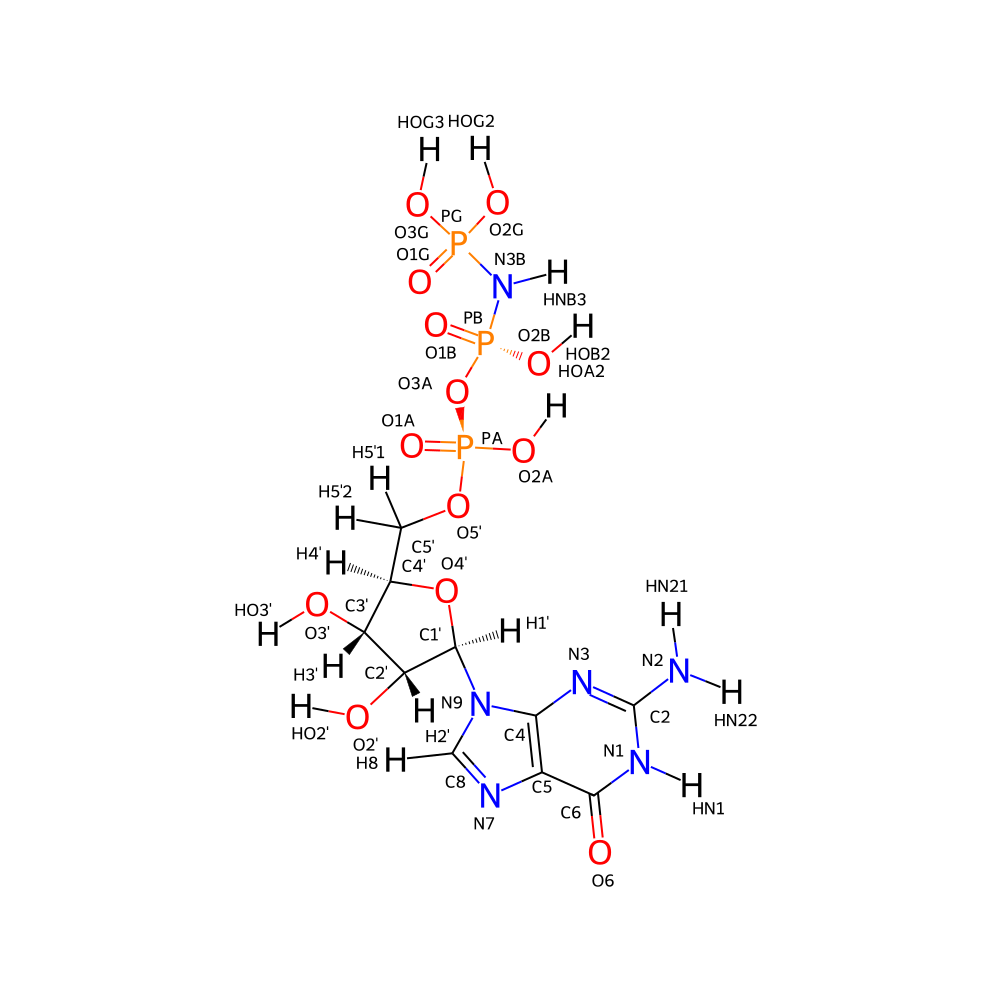

In [240]:
MG_off = CCD_RESIDUE_DEFINITION_CACHE["MG"][0].to_openff_molecule()
#
MG_resdef = ResidueDefinition.from_molecule(
    molecule=MG_off,
    residue_name="MG",
)
#
GNP_off = CCD_RESIDUE_DEFINITION_CACHE["GNP"][0].to_openff_molecule()
#
GNP_resdef = ResidueDefinition.from_molecule(
    molecule=GNP_off,
    residue_name="GNP",
)
#
draw_molecule(
    GNP_off,
    width=1000,
    height=1000,
    atom_notes={
        i: (
            f"{atom.name}"
            + f"{'^' if bool(atom.metadata.get('leaving_atom')) else ''}"
        )
        for i, atom in enumerate(GNP_off.atoms)
    },
)

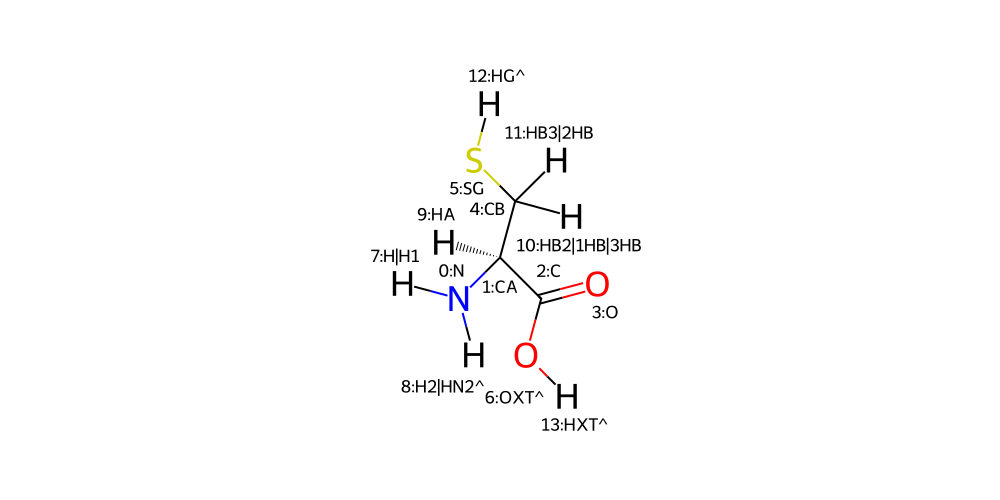

In [123]:
cysteine = CCD_RESIDUE_DEFINITION_CACHE["CYS"][0].to_openff_molecule()
draw_molecule(
    cysteine,
    width=1000,
    height=500,
    atom_notes={
        i: (
            f"{i}:{'|'.join([atom.name, *atom.metadata.get('synonyms', '').split()])}"
            + f"{'^' if bool(atom.metadata.get('leaving_atom')) else ''}"
        )
        for i, atom in enumerate(cysteine.atoms)
    },
)

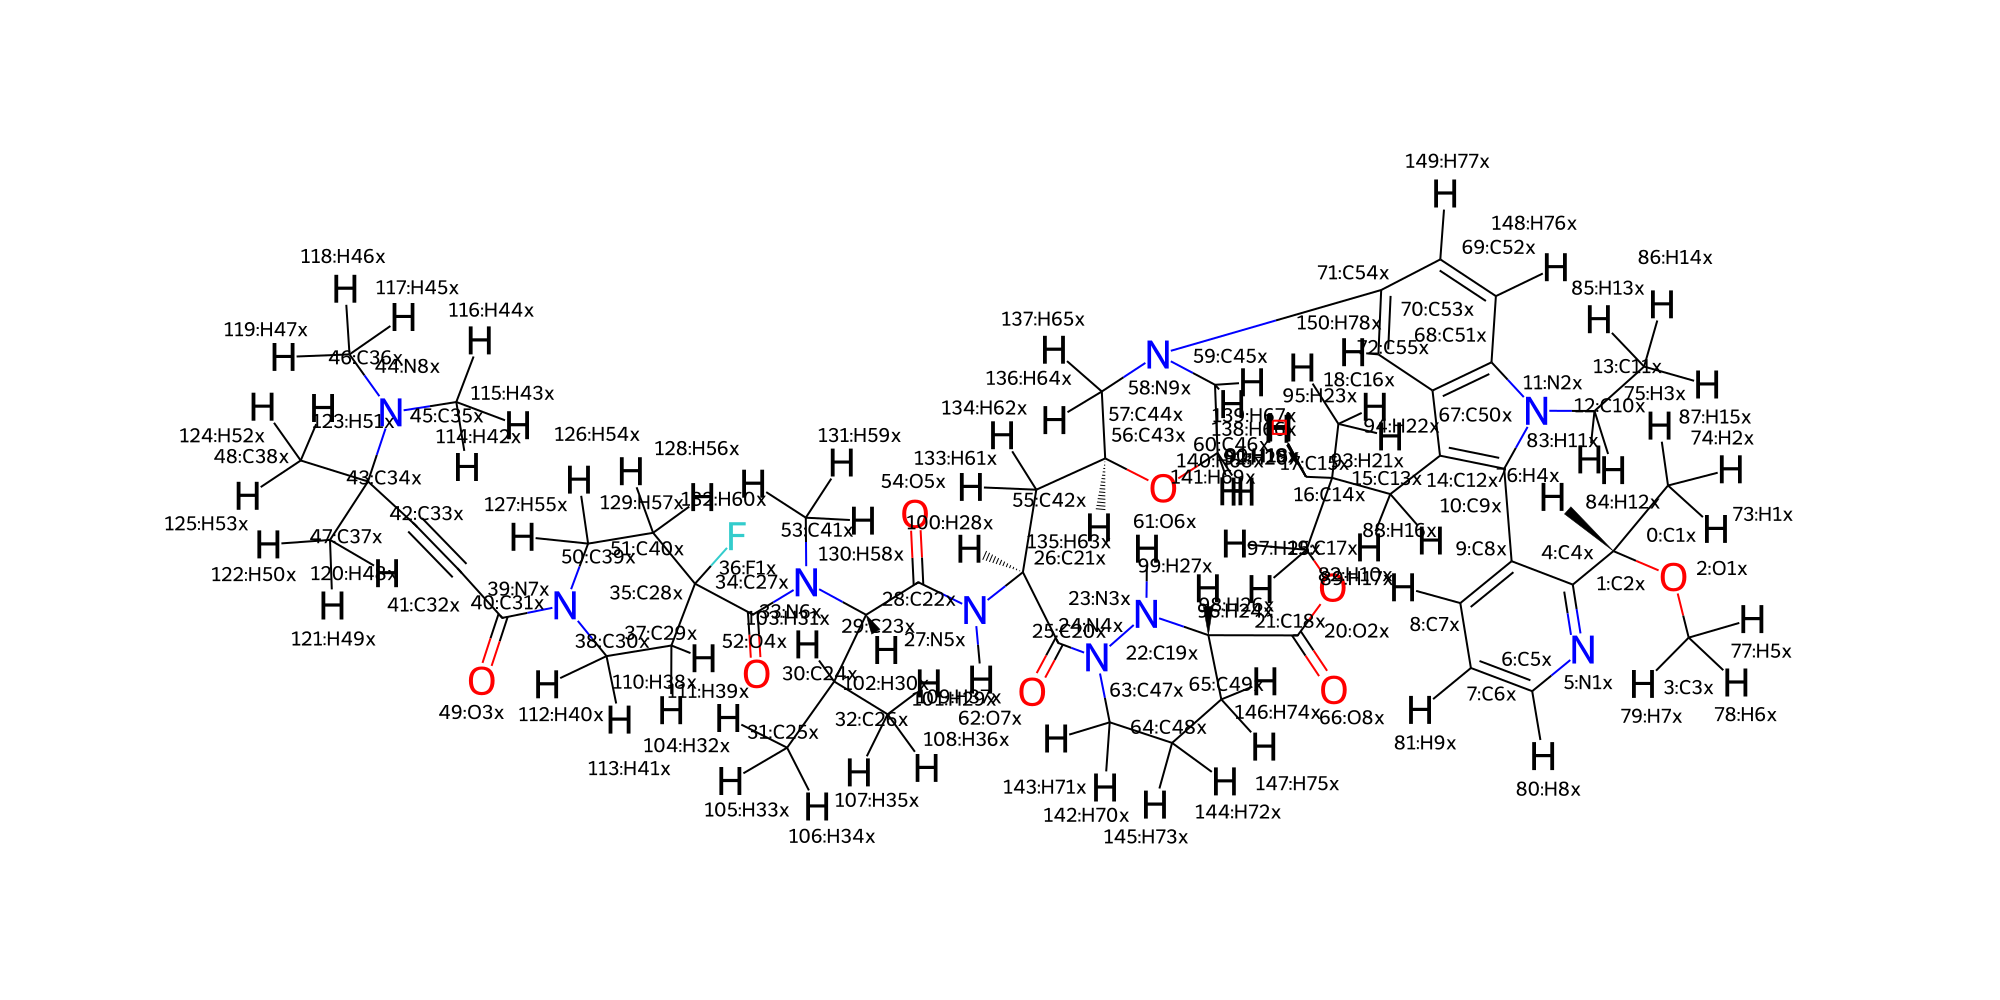

In [124]:
Elironrasib = Molecule.from_smiles("C[C@H](OC)C(N=CC=C1)=[C@@]1[C@](N2CC)=C(CC(C)(C)COC([C@H]3NN(C([C@@H](NC([C@H](C(C)C)N(C(C4(F)CCN(C(C#CC(N(C)C)(C)C)=O)CC4)=O)C)=O)C[C@H]5CN6CCO5)=O)CCC3)=O)C7=C2C=CC6=C7")
Elironrasib.generate_unique_atom_names()

draw_molecule(
    Elironrasib,
    width=2000,
    height=1000,
    atom_notes={
        i: (
            f"{i}:{'|'.join([atom.name, *atom.metadata.get('synonyms', '').split()])}"
            + f"{'^' if bool(atom.metadata.get('leaving_atom')) else ''}"
        )
        for i, atom in enumerate(Elironrasib.atoms)
    },
)

In [209]:
from rdkit import Chem
from rdkit.Chem.EnumerateStereoisomers import EnumerateStereoisomers, StereoEnumerationOptions
m = Chem.MolFromSmarts('[C:10]-[S:1]-[C:3](-[C:11])=[C:4]-[C:5](=[O:6])-[N:7](-[C:8])-[C:9]')
isomers = tuple(EnumerateStereoisomers(m))
print(len(isomers))
for smarts in sorted(Chem.MolToSmarts(x, isomericSmiles=True) for x in isomers):
    print(smarts)
m, isomers[0], isomers[1]

2
[C:10]-[S:1]/[C:3](-[C:11])=[C:4]/[C:5](=[O:6])-[N:7](-[C:8])-[C:9]
[C:10]-[S:1]/[C:3](-[C:11])=[C:4]\[C:5](=[O:6])-[N:7](-[C:8])-[C:9]


(<rdkit.Chem.rdchem.Mol at 0x7e86bd9d9850>,
 <rdkit.Chem.rdchem.Mol at 0x7e86ce674450>)

In [210]:
covalent_triple_bond_smarts_cis = '[C:10]-[S:1]-[H:2].[C:11]-[C:3]#[C:4]-[C:5](=[O:6])-[N:7](-[C:8])-[C:9]>>[C:10]-[S:1]/[C:3](-[C:11])=[C:4](/[H])[C:5](=[O:6])-[N:7](-[C:8])-[C:9]'
#covalent_triple_bond_smarts_cis = '[C:10]-[S:1]-[H:2].[C:11]-[C:3]#[C:4]-[C:5](=[O:6])-[N:7](-[C:8])-[C:9]>>[C:10]-[S:1]/[C:3](-[C:11])=[C:4](\[H])[C:5](=[O:6])-[N:7](-[C:8])-[C:9]'
rxn = ReactionFromSmarts(covalent_triple_bond_smarts_cis)
d2d = Draw.MolDraw2DCairo(800, 300)
d2d.DrawReaction(rxn, highlightByReactant=True)
Image(value=d2d.GetDrawingText())

Image(value=b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x03 \x00\x00\x01,\x08\x02\x00\x00\x00\xb4O@m\x00\x00…

[16:02:09] mapped atoms in the reactants were not mapped in the products.
  unmapped numbers are: 2 


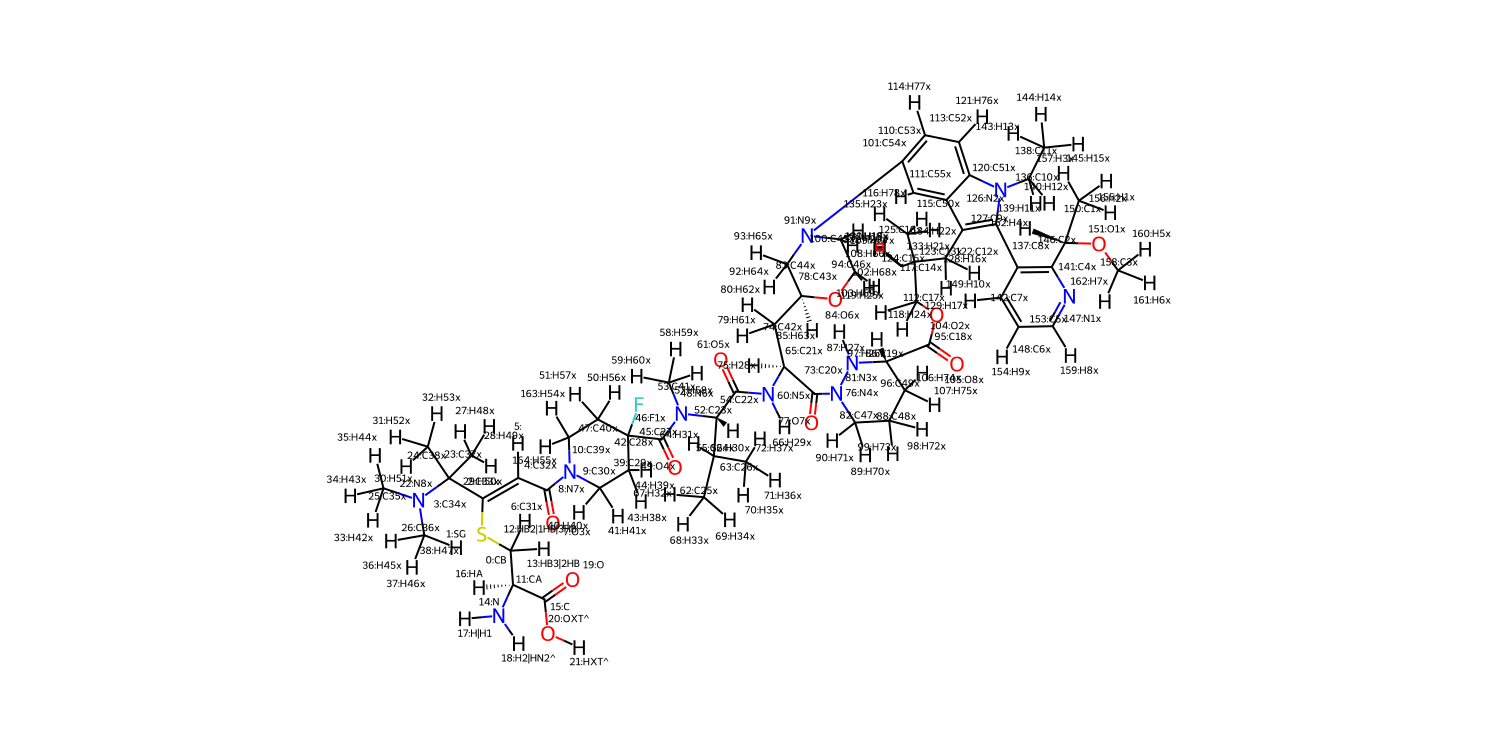

In [211]:
from ptm_prototype import react_mod

products = list(react_mod([cysteine, Elironrasib], covalent_triple_bond_smarts_cis))
adduct = products[0][0]

draw_molecule(
    adduct,
    width=1500,
    height=750,
    atom_notes={
        i: (
            f"{i}:{'|'.join([atom.name, *atom.metadata.get('synonyms', '').split()])}"
            + f"{'^' if bool(atom.metadata.get('leaving_atom')) else ''}"
        )
        for i, atom in enumerate(adduct.atoms)
    },
)

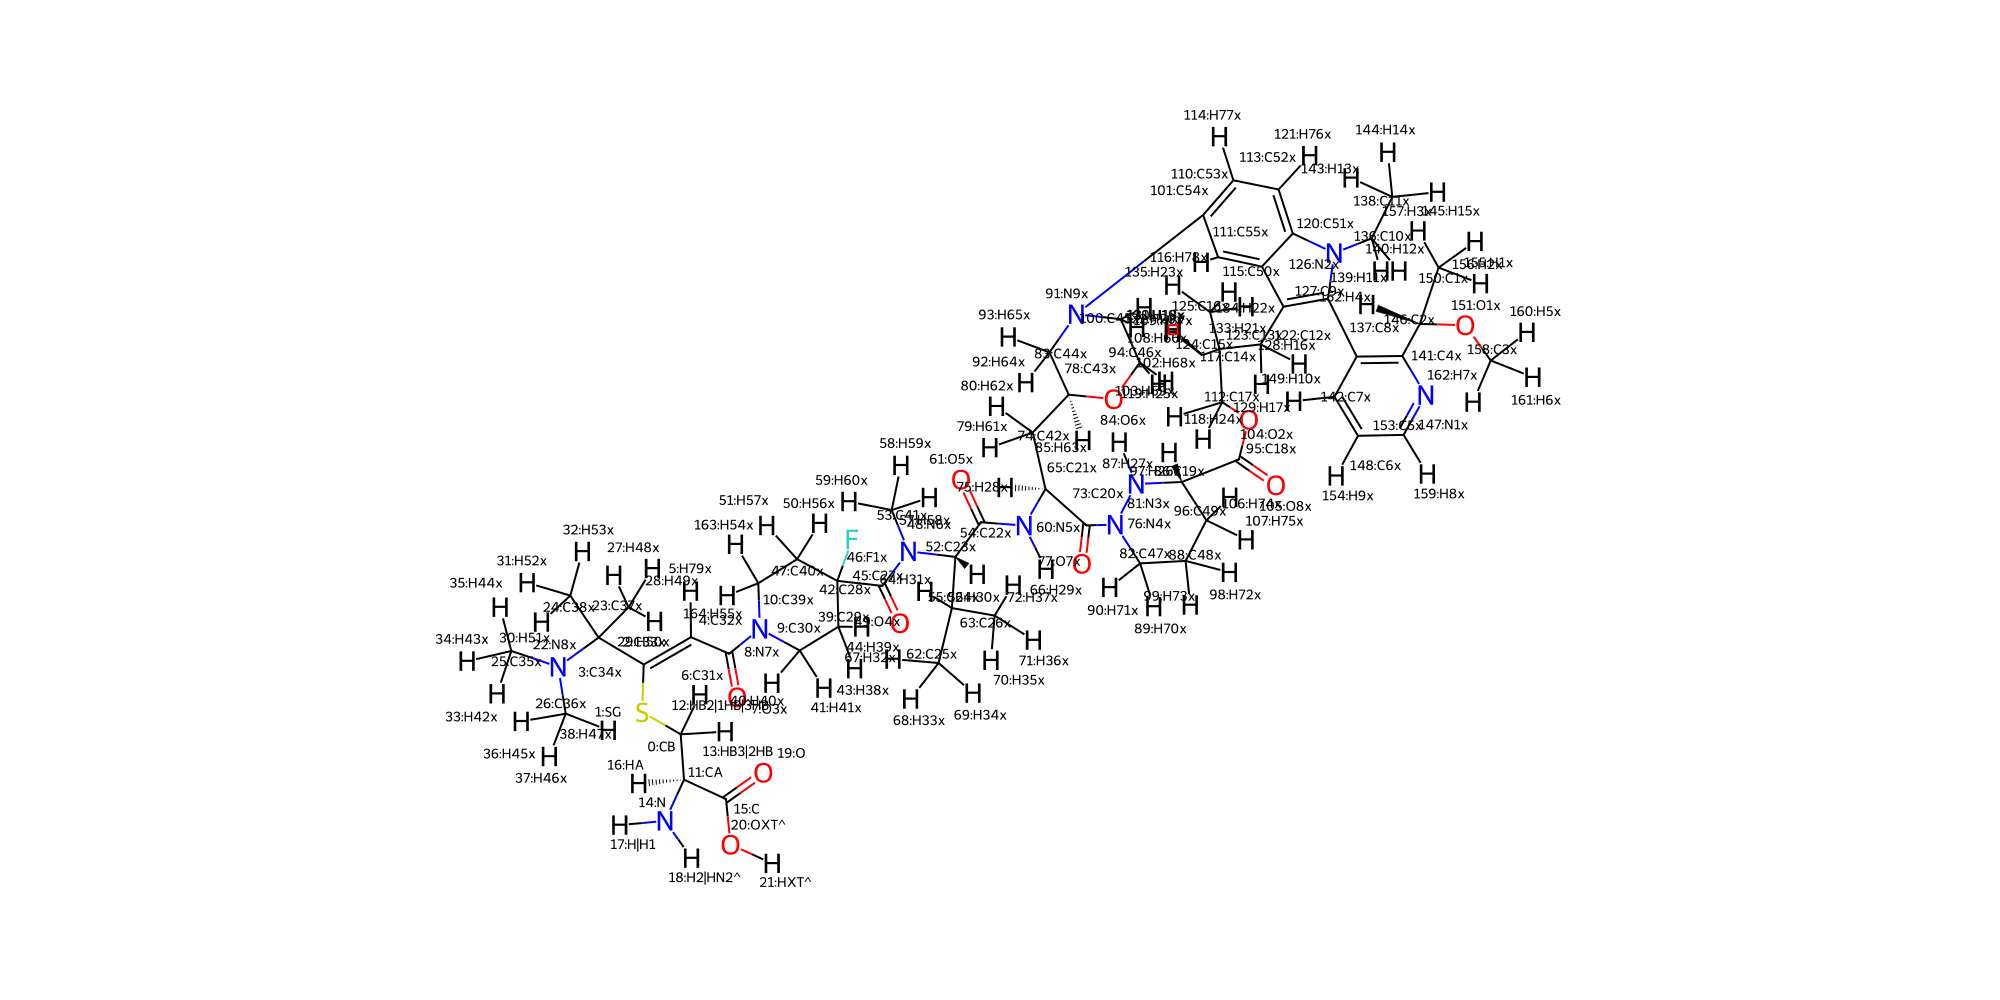

In [212]:
adduct.atom(5).name = 'H79x'

draw_molecule(
    adduct,
    width=2000,
    height=1000,
    atom_notes={
        i: (
            f"{i}:{'|'.join([atom.name, *atom.metadata.get('synonyms', '').split()])}"
            + f"{'^' if bool(atom.metadata.get('leaving_atom')) else ''}"
        )
        for i, atom in enumerate(adduct.atoms)
    },
)

In [ ]:
from openff.pablo import ResidueDefinition
from openff.pablo.chem import PEPTIDE_BOND

ligand_resdef = ResidueDefinition.from_molecule(
    molecule=adduct,
    residue_name="LIG",
    linking_bond=PEPTIDE_BOND,
)
#substructure_mol = ligand_resdef.to_openff_molecule()

In [214]:
suppl = Chem.SDMolSupplier('CYSLIG_clean.sdf')[0]
suppl_H = Chem.AddHs(suppl, addCoords=True)
Elironrasib_ref_H_canonical_smiles = Chem.MolToSmiles(suppl_H, canonical=True)
print(Elironrasib_ref_H_canonical_smiles)
#
adduct_mol_H = adduct.to_rdkit()
Elironrasib_top_H_canonical_smiles = Chem.MolToSmiles(adduct_mol_H, canonical=True)
print(Elironrasib_top_H_canonical_smiles)

[H]OC(=O)[C@@]([H])(N([H])[H])C([H])([H])S/C(=C(/[H])C(=O)N1C([H])([H])C([H])([H])C(F)(C(=O)N(C([H])([H])[H])[C@]([H])(C(=O)N([H])[C@]2([H])C(=O)N3N([H])[C@]([H])(C(=O)OC([H])([H])C(C([H])([H])[H])(C([H])([H])[H])C([H])([H])c4c(-c5c([C@@]([H])(OC([H])([H])[H])C([H])([H])[H])nc([H])c([H])c5[H])n(C([H])([H])C([H])([H])[H])c5c([H])c([H])c(c([H])c45)N4C([H])([H])C([H])([H])O[C@]([H])(C4([H])[H])C2([H])[H])C([H])([H])C([H])([H])C3([H])[H])C([H])(C([H])([H])[H])C([H])([H])[H])C([H])([H])C1([H])[H])C(N(C([H])([H])[H])C([H])([H])[H])(C([H])([H])[H])C([H])([H])[H]
[H]OC(=O)[C@@]([H])(N([H])[H])C([H])([H])S/C(=C(/[H])C(=O)N1C([H])([H])C([H])([H])C(F)(C(=O)N(C([H])([H])[H])[C@]([H])(C(=O)N([H])[C@]2([H])C(=O)N3N([H])[C@]([H])(C(=O)OC([H])([H])C(C([H])([H])[H])(C([H])([H])[H])C([H])([H])C4=C(c5c([C@@]([H])(OC([H])([H])[H])C([H])([H])[H])nc([H])c([H])c5[H])N(C([H])([H])C([H])([H])[H])c5c([H])c([H])c(c([H])c54)N4C([H])([H])C([H])([H])O[C@]([H])(C4([H])[H])C2([H])[H])C([H])([H])C([H])([H])C3([H])[H])

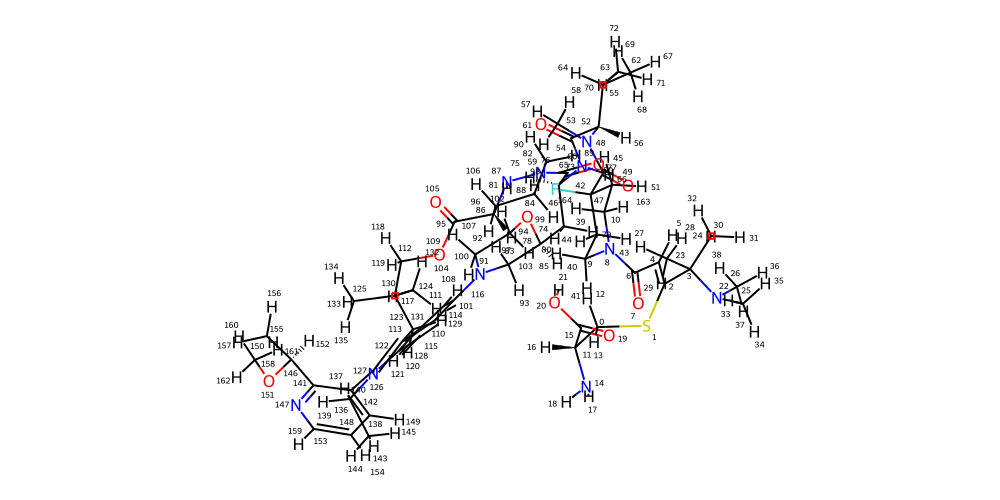

In [215]:
list_1 = list(map(int, adduct_mol_H.GetProp("_smilesAtomOutputOrder")[1:-1].split(",")))
list_2 = list(map(int, suppl_H.GetProp("_smilesAtomOutputOrder")[1:-1].split(",")))
if Elironrasib_top_H_canonical_smiles == Elironrasib_ref_H_canonical_smiles:
    print(True)
    res = list(zip(list_2,list_1))
    res.sort(key=lambda x: x[1])
    unzipped_list_2, unzipped_list_1 = zip(*res)
    new_indices = list(unzipped_list_2)
#
suppl_r = Chem.RenumberAtoms(suppl_H, new_indices)
IPython.display.display(Chem.Draw.MolToImage(suppl_r, size=(1000, 500), options=draw_options))

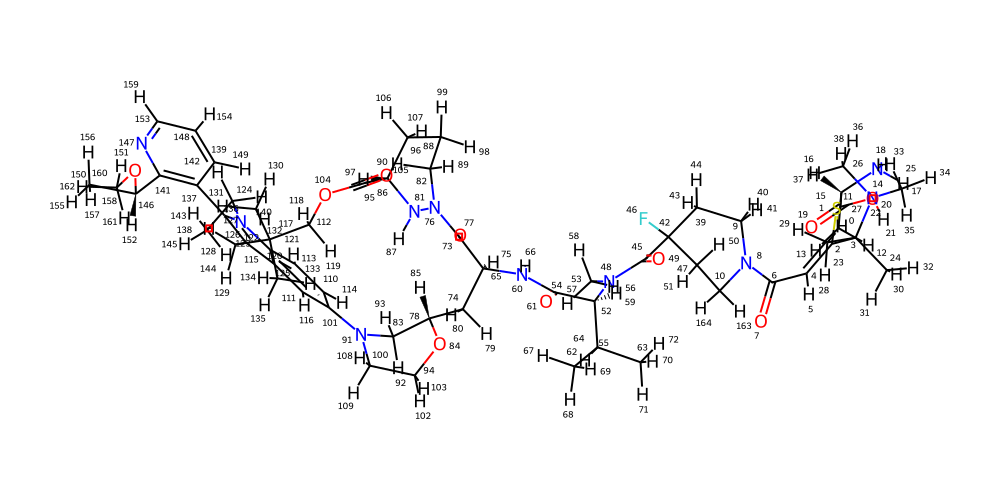

In [216]:
IPython.display.display(Chem.Draw.MolToImage(adduct_mol_H, size=(1000, 500), options=draw_options))

In [217]:
for i, atom in enumerate(adduct_mol_H.GetAtoms()):
    info = AtomPDBResidueInfo(
        atom.GetProp('_Name'),
        atom.GetIdx() + 1,
        ' ',
        'LIG',
        12,
        'B',
        ' ',
    )    
    suppl_r.GetAtomWithIdx(i).SetMonomerInfo(info)
Chem.MolToPDBFile(suppl_r, 'CYSLIG_clean_renamed.pdb')

use openmm-setup in conda env openfe_env

In [241]:
from openff.pablo import CCD_RESIDUE_DEFINITION_CACHE, topology_from_pdb

topology = topology_from_pdb(
    "9BFX_clean_biopdb_renamed-processed_final_1.pdb",
    residue_database=CCD_RESIDUE_DEFINITION_CACHE.with_({"LIG": [ligand_resdef], "MG": [MG_resdef], "GNP": [GNP_resdef]}),
)

In [256]:
topology.to_file('off_top.pdb')

## Solvate with the OpenFF PackMOL wrapper

Now that we have an OpenFF `Topology` of the post-translationally modified protein, we can solvate it in familiar ways. For example, with the `solvate_topology` function from the experimental Interchange PackMOL wrapper:

In [242]:
topology = solvate_topology(
    topology,
    nacl_conc=Quantity(0.1, "mol/L"),
    #padding=Quantity(1.0, "nm"),
    padding=None,
    box_shape=RHOMBIC_DODECAHEDRON,
)

In [254]:
topology.to_pdb_file('off_prep.pdb')

AttributeError: 'Topology' object has no attribute 'to_pdb_file'. If looking for a `HierarchyScheme` iterator, not all molecules in this topology have an interator name to_pdb_file defined.

Note that this box requires NPT equilibration before production simulation.

## Parametrize the solvated system using a combination of the Sage and FF14sb force fields and the NAGL graph charge package

The final new component of the prototype is the "swiss cheese" parametrization method. This refers to applying library charges to the parts of the protein for which they are defined in the ff14sb force field, and "filling in the holes" with NAGL graph charges. This is a streamlined stopgap to a more natural direct parametrization to a future force field that supports both proteins and NAGL charges natively. Note that this produces a bit of a Frankenstein's monster of a parametrization; while NAGL charges are philosophically compatible with both Sage and Amber force fields, and Sage and Amber force fields are philosophically compatible with each other, the actual quality of the resulting simulations has never been rigorously tested and might hold some surprises! If you perform such testing, please [let us know!]

This'll take a few minutes; graph charges are much faster than quantum chemical methods, but a protein is still a large molecule.

[let us know!]:https://github.com/openforcefield/ptm_prototype/issues/new

In [ ]:
from ptm_prototype import parametrize_with_nagl

sage_ff14sb = ForceField("openff-2.2.1.offxml", "ff14sb_off_impropers_0.0.4.offxml", )

interchange = parametrize_with_nagl(force_field=sage_ff14sb, topology=topology, allow_nonintegral_charges=True)

adding dummy charges to force field ...
making Interchange ...
replacing dummy charges with NAGL charges ... 
assigning graph charges to C58H85FN10O10S ...
continuing with dummy charge replacement ...


## Run a short simulation in OpenMM

Now that we have an Interchange, we can prepare simulations in any of the usual output engines. Here we'll use OpenMM. We'll also save a copy of the system to disk so we have an exact record of what we simulated. We're not aiming to tell you how to run a simulation here, just demonstrate what we can do; you'll need much more substantial equilibration to clean up the PackMOL box.

In [248]:
import openmm
from ptm_prototype import get_openmm_total_charge

temperature = 300 * openmm.unit.kelvin
pressure = 1 * openmm.unit.bar

timestep = 2 * openmm.unit.femtosecond
friction_coeff = 1 / openmm.unit.picosecond
barostat_frequency = 25

print("making OpenMM simulation ...")
simulation = interchange.to_openmm_simulation(
    integrator=openmm.LangevinMiddleIntegrator(
        temperature,
        friction_coeff,
        timestep,
    ),
    additional_forces=[
        openmm.MonteCarloBarostat(
            pressure,
            temperature,
            barostat_frequency,
        ),
    ],
)
#
print(f"total system charge is {get_openmm_total_charge(simulation.system)}")


with open("system.xml", "w") as f:
    f.write(openmm.XmlSerializer.serialize(simulation.system))

making OpenMM simulation ...
total system charge is 0.27189982823230885


In [249]:
from openmm.app import PDBFile
with open('initial_system.pdb', 'w') as f:
    PDBFile.writeFile(simulation.topology, simulation.context.getState(getPositions=True).getPositions(), f)

In [250]:
context = simulation.context
print("Simulation is running on:", context.getPlatform().getName())

Simulation is running on: CUDA


Minimize the energy:

In [251]:
simulation.context.computeVirtualSites()
simulation.minimizeEnergy()
simulation.context.setVelocitiesToTemperature(simulation.integrator.getTemperature())

In [252]:
dcd_reporter = app.DCDReporter('trajectory.dcd', 100)
simulation.reporters.append(dcd_reporter)
#
state_reporter = app.StateDataReporter('energy_data.csv',
                                       100,
                                       step=True,
                                       time=True, 
                                       potentialEnergy=True,
                                       kineticEnergy=True,
                                       totalEnergy=True,
                                       temperature=True,
                                       volume=True,
                                       density=True,
                                       speed=True,
                                      )
simulation.reporters.append(state_reporter)

Run the simulation for a minute of wall time:

In [253]:
simulation.runForClockTime(1.0 * openmm.unit.minute)

ValueError: Particle position is NaN.  For more information, see https://github.com/openmm/openmm/wiki/Frequently-Asked-Questions#nan

Finally, visualize the resulting trajectory in NGLView!

In [53]:
from ptm_prototype import nglview_show_openmm

w = nglview_show_openmm(simulation.topology, "trajectory.dcd")
w.add_licorice("DYE", radius=0.3)
w.center("DYE")
w

NGLWidget(max_frame=492)

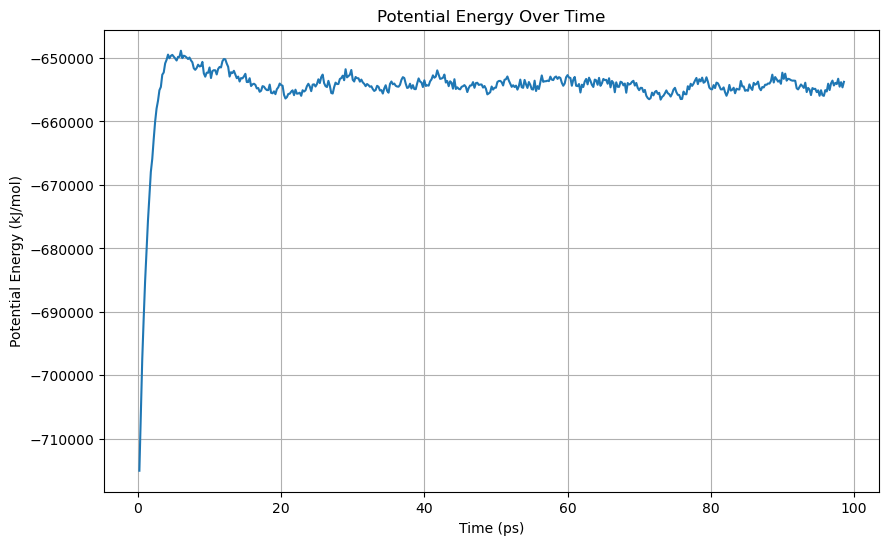

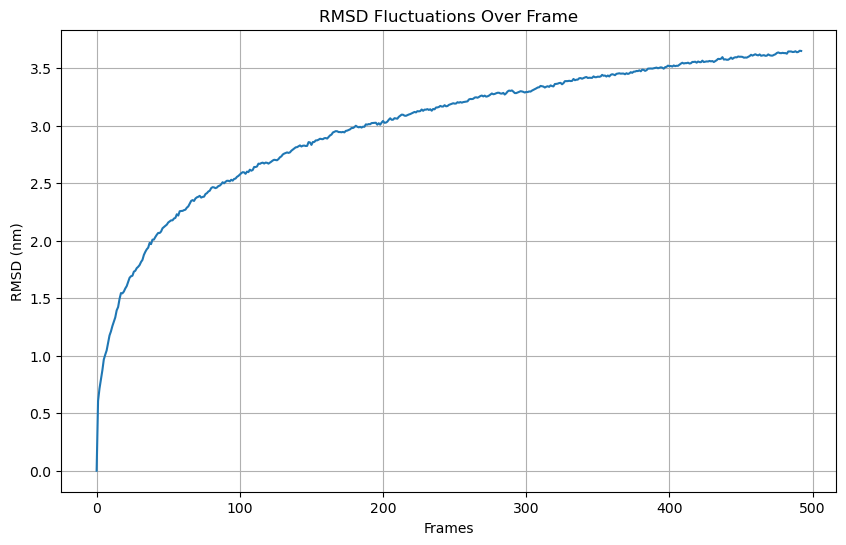

In [54]:
import mdtraj as md
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
#
topology_file = 'initial_system.pdb'
trajectory_file = 'trajectory.dcd'
traj = md.load(trajectory_file, top=topology_file)
#
state_file = 'energy_data.csv'
#
def plot_potential_energy(state_file):

    df = pd.read_csv(state_file)
    plt.figure(figsize=(10, 6))
    sns.lineplot(data=df, x='Time (ps)', y='Potential Energy (kJ/mole)')
    plt.xlabel('Time (ps)')
    plt.ylabel('Potential Energy (kJ/mol)')
    plt.title('Potential Energy Over Time')
    plt.grid(True)
    plt.show()


def plot_rmsd_fluctuations(trajectory):

    traj.superpose(traj, frame=0)
    rmsd = md.rmsd(traj, traj, 0)
    frames = np.arange(0, traj.n_frames)

    plt.figure(figsize=(10, 6))
    plt.plot(frames, rmsd, label='RMSD')
    plt.xlabel('Frames')
    plt.ylabel('RMSD (nm)')
    plt.title('RMSD Fluctuations Over Frame')
    plt.grid(True)
    plt.show()

if __name__ == "__main__":
    plot_potential_energy(state_file)
    plot_rmsd_fluctuations(traj)